# TSAI Assignment 12

Import Headers

In [1]:
from __future__ import print_function
from utils import torch,nn,F,optim,datasets,transforms
import utils
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Get the custom resnet model

In [2]:
import custom_resnet
loss_criterion = nn.CrossEntropyLoss() 
max_lr= 4.51E-02
lr = 0.1
model = custom_resnet.getModel(loss_criterion, lr)

C:\Users\SToleti\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


Use the lightning magic to train your model

In [3]:
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import TQDMProgressBar

AVAIL_GPUS = min(1, torch.cuda.device_count())

## Comment this for now, calling this causes train progress bar in prev epoch to disappear
# Callback to disable progress bar for validation loader
#class LitProgressBar(TQDMProgressBar):   
#    def init_validation_tqdm(self):
#        bar = tqdm(            
#            disable=True,            
#        )
#        return bar
#bar = LitProgressBar()

trainer = Trainer(
    #callbacks=[bar],
    accelerator = 'gpu',
    max_epochs = 24
    #precision = 16 ## Uncommenting this is causing NaN values for loss
    #gradient_clip_val=max_lr, gradient_clip_algorithm="value",
    #detect_anomaly=True
)


# Fit model
trainer.fit(model) #train_loader,test_loader

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                 | Type               | Params
-------------------------------------------------------------
0  | loss_criteria        | CrossEntropyLoss   | 0     
1  | accuracy             | MulticlassAccuracy | 0     
2  | convblockPreparation | Sequential         | 1.9 K 
3  | convblockL1X1        | Sequential         | 74.0 K
4  | convblockL1R1        | Sequential         | 295 K 
5  | convblockL2X1        | Sequential         | 295 K 
6  | convblockL3X1        | Sequential         | 1.2 M 
7  | convblockL3R1        | Sequential         | 4.7 M 
8  | FinalBlock           | Sequential         | 0     
9  | FC                   | Sequential         | 5.1 K 
10 | dropout              | Dropout            | 0     
-------------------------------------------------------------
6.6 M     Trainable params
0         Non-trainable params
6.6 M     Total params
26.293    Total estimated model params size (MB)


Epoch 0: 100%|█████████████████████████████████████████| 88/88 [03:02<00:00,  2.07s/it, v_num=46, tr_loss=1.250, tr_acc=0.577]
Validation: 0it [00:00, ?it/s]
Epoch 1: 100%|████████████| 88/88 [00:32<00:00,  2.67it/s, v_num=46, tr_loss=1.390, tr_acc=0.535, vl_loss=1.290, vl_acc=0.534]
Validation: 0it [00:00, ?it/s]
Epoch 2: 100%|████████████| 88/88 [00:34<00:00,  2.56it/s, v_num=46, tr_loss=0.943, tr_acc=0.656, vl_loss=1.320, vl_acc=0.557]
Validation: 0it [00:00, ?it/s]
Epoch 3: 100%|████████████| 88/88 [00:33<00:00,  2.65it/s, v_num=46, tr_loss=0.834, tr_acc=0.691, vl_loss=1.080, vl_acc=0.646]
Validation: 0it [00:00, ?it/s]
Epoch 4: 100%|████████████| 88/88 [00:33<00:00,  2.64it/s, v_num=46, tr_loss=0.704, tr_acc=0.752, vl_loss=0.815, vl_acc=0.727]
Validation: 0it [00:00, ?it/s]
Validation DataLoader 0:  60%|███████████████████████████████████████                          | 6/10 [00:00<00:00,  7.04it/s]


Epoch 5: 100%|████████████| 88/88 [00:33<00:00,  2.66it/s, v_num=46, tr_loss=0.637, tr_acc=0.774, vl_loss=0.741, vl_acc=0.747]
Validation: 0it [00:00, ?it/s]
Epoch 6: 100%|████████████| 88/88 [00:33<00:00,  2.66it/s, v_num=46, tr_loss=0.608, tr_acc=0.807, vl_loss=0.720, vl_acc=0.754]
Validation: 0it [00:00, ?it/s]
Epoch 7: 100%|████████████| 88/88 [00:33<00:00,  2.64it/s, v_num=46, tr_loss=0.562, tr_acc=0.803, vl_loss=0.857, vl_acc=0.722]
Validation: 0it [00:00, ?it/s]
Epoch 8: 100%|████████████| 88/88 [00:33<00:00,  2.66it/s, v_num=46, tr_loss=0.605, tr_acc=0.800, vl_loss=0.612, vl_acc=0.792]
Validation: 0it [00:00, ?it/s]
Epoch 9: 100%|████████████| 88/88 [00:33<00:00,  2.60it/s, v_num=46, tr_loss=0.601, tr_acc=0.781, vl_loss=0.548, vl_acc=0.813]
Validation: 0it [00:00, ?it/s]
Validation DataLoader 0:  20%|█████████████                                                    | 2/10 [00:00<00:01,  7.21it/s]


Epoch 10: 100%|███████████| 88/88 [00:33<00:00,  2.66it/s, v_num=46, tr_loss=0.523, tr_acc=0.836, vl_loss=0.589, vl_acc=0.805]
Validation: 0it [00:00, ?it/s]
Epoch 11: 100%|███████████| 88/88 [00:33<00:00,  2.65it/s, v_num=46, tr_loss=0.446, tr_acc=0.844, vl_loss=0.540, vl_acc=0.819]
Validation: 0it [00:00, ?it/s]
Epoch 12: 100%|███████████| 88/88 [00:33<00:00,  2.66it/s, v_num=46, tr_loss=0.420, tr_acc=0.860, vl_loss=0.578, vl_acc=0.806]
Validation: 0it [00:00, ?it/s]
Epoch 13: 100%|███████████| 88/88 [00:33<00:00,  2.64it/s, v_num=46, tr_loss=0.383, tr_acc=0.860, vl_loss=0.540, vl_acc=0.814]
Validation: 0it [00:00, ?it/s]
Epoch 14: 100%|███████████| 88/88 [00:33<00:00,  2.64it/s, v_num=46, tr_loss=0.310, tr_acc=0.899, vl_loss=0.541, vl_acc=0.821]
Validation: 0it [00:00, ?it/s]


Epoch 15: 100%|███████████| 88/88 [00:33<00:00,  2.64it/s, v_num=46, tr_loss=0.324, tr_acc=0.888, vl_loss=0.429, vl_acc=0.859]
Validation: 0it [00:00, ?it/s]
Epoch 16: 100%|███████████| 88/88 [00:33<00:00,  2.63it/s, v_num=46, tr_loss=0.274, tr_acc=0.910, vl_loss=0.400, vl_acc=0.863]
Validation: 0it [00:00, ?it/s]
Epoch 17: 100%|███████████| 88/88 [00:35<00:00,  2.45it/s, v_num=46, tr_loss=0.252, tr_acc=0.906, vl_loss=0.385, vl_acc=0.877]
Validation: 0it [00:00, ?it/s]
Validation DataLoader 0:  20%|█████████████                                                    | 2/10 [00:00<00:01,  7.16it/s]

Epoch 18: 100%|███████████| 88/88 [00:34<00:00,  2.53it/s, v_num=46, tr_loss=0.214, tr_acc=0.928, vl_loss=0.363, vl_acc=0.880]
Validation: 0it [00:00, ?it/s]
Validation DataLoader 0:  80%|████████████████████████████████████████████████████             | 8/10 [00:01<00:00,  6.89it/s]


Epoch 19: 100%|███████████| 88/88 [00:33<00:00,  2.61it/s, v_num=46, tr_loss=0.197, tr_acc=0.930, vl_loss=0.328, vl_acc=0.889]
Validation: 0it [00:00, ?it/s]
Epoch 20: 100%|███████████| 88/88 [00:33<00:00,  2.66it/s, v_num=46, tr_loss=0.175, tr_acc=0.945, vl_loss=0.309, vl_acc=0.895]
Validation: 0it [00:00, ?it/s]
Epoch 21: 100%|███████████| 88/88 [00:32<00:00,  2.68it/s, v_num=46, tr_loss=0.190, tr_acc=0.921, vl_loss=0.311, vl_acc=0.897]
Validation: 0it [00:00, ?it/s]
Epoch 22: 100%|███████████| 88/88 [00:32<00:00,  2.67it/s, v_num=46, tr_loss=0.165, tr_acc=0.932, vl_loss=0.322, vl_acc=0.891]
Validation: 0it [00:00, ?it/s]
Epoch 23: 100%|███████████| 88/88 [00:33<00:00,  2.66it/s, v_num=46, tr_loss=0.169, tr_acc=0.939, vl_loss=0.292, vl_acc=0.900]
Validation: 0it [00:00, ?it/s]
Validation DataLoader 0:  40%|██████████████████████████                                       | 4/10 [00:00<00:00,  7.49it/s]


Epoch 23: 100%|███████████| 88/88 [00:34<00:00,  2.54it/s, v_num=46, tr_loss=0.169, tr_acc=0.939, vl_loss=0.311, vl_acc=0.895]

`Trainer.fit` stopped: `max_epochs=24` reached.


Epoch 23: 100%|███████████| 88/88 [00:35<00:00,  2.49it/s, v_num=46, tr_loss=0.169, tr_acc=0.939, vl_loss=0.311, vl_acc=0.895]


In [4]:
trainer.test(model)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing DataLoader 0: 100%|███████████████████████████████████████████████████████████████████| 20/20 [00:03<00:00,  5.72it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃   Runningstage.testing    ┃                           ┃
┃          metric           ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          vl_acc           │    0.9193000197410583     │
│          vl_loss          │    0.24440039694309235    │
└───────────────────────────┴───────────────────────────┘

[{'vl_loss': 0.24440039694309235, 'vl_acc': 0.9193000197410583}]

torch.save(model.state_dict(),
           "saved_model.pth")

Plot test-train accuracies

In [5]:
model.train_losses = [i.to('cpu').detach().numpy() for i in model.train_losses]
model.test_losses = [i.to('cpu').detach().numpy() for i in model.test_losses]

In [17]:
model.train_accs = [i.to('cpu').numpy() for i in model.train_accs] 
model.test_accs = [i.to('cpu').numpy() for i in model.test_accs] 


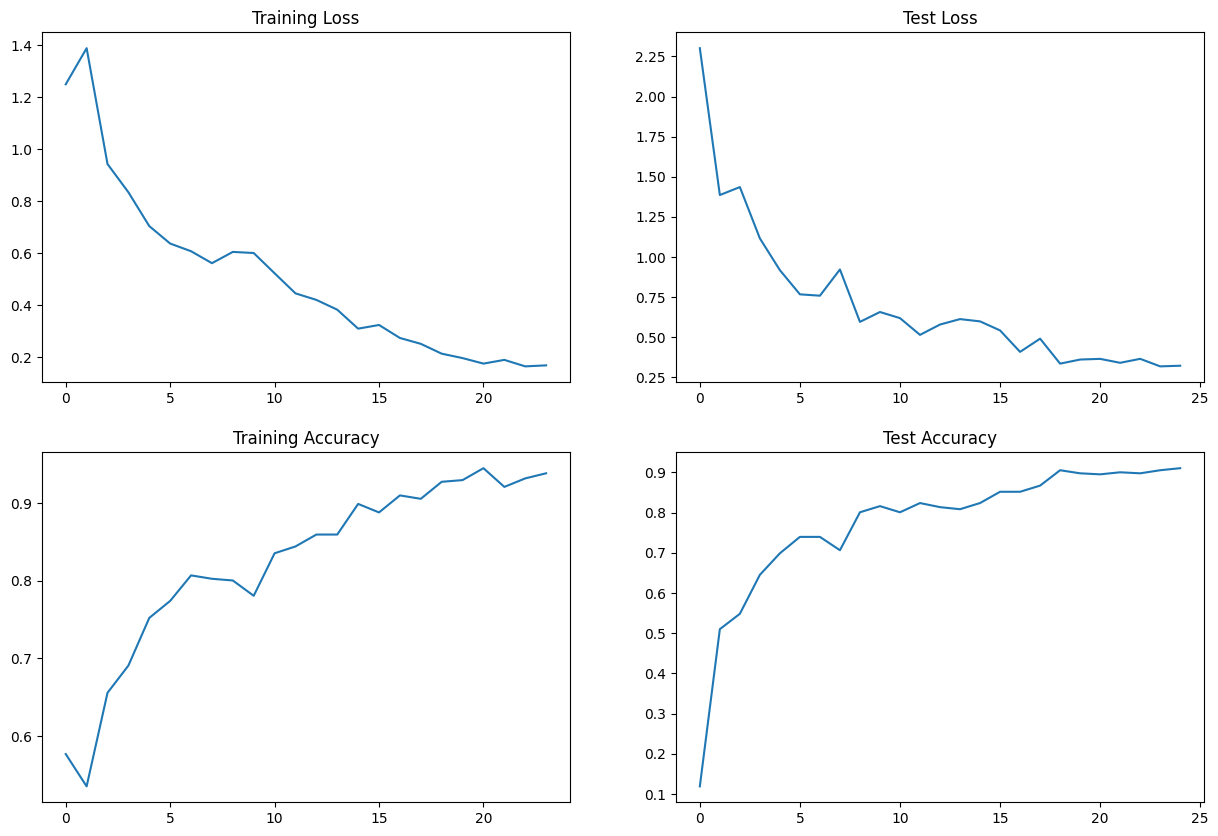

In [19]:
utils.printModelTrainTestAccuracy(model.train_accs, model.train_losses,
                                  model.test_accs, model.test_losses)

In [21]:
#reset
model.train_accs= []
model.train_losses = []
model.test_accs =[] 
model.test_losses =[]

Print 10 misclassified images

In [ ]:
import torchvision
misclassfied_images, misclassfied_labels,actual_labels = utils.getMiscassifications(model.to('cuda'), model.test_dataloader(), 10)
utils.imshow(torchvision.utils.make_grid(misclassfied_images.to('cpu')))
print('Actual labels:  ')
print('  '.join(f'{actual_labels[j]:5s}' for j in range(10)))
print('Predicted labels:  ')
print('  '.join(f'{misclassfied_labels[j]:5s}' for j in range(10)))